In [1]:
import numpy as np
import pandas as pd
from pygama import lh5

%matplotlib inline
#%matplotlib widget
import matplotlib.pyplot as plt

In [35]:
# Load Data

idet = 0
group_path = ['/icpcs/icpc1/dsp', '/icpcs/icpc2/dsp', '/icpcs/icpc3/dsp', '/icpcs/icpc4/dsp'] 

f_list = ['dsp/Run7005?_dsp.lh5']
sigs = ['fltp_sig_73', 'fltp_sig_73_5', 'fltp_sig_74', 'fltp_sig_74_5', 'fltp_sig_75']
ftps = ['trapEftp_2_0', 'trapEftp_4_0', 'trapEftp_6_0', 'trapEftp_8_0']
par_list = ['trapEftp', 'ct_corr', *sigs, 'tp_0', *ftps]
df = lh5.load_dfs(f_list, par_list, group_path[idet])
df = df.loc[df.trapEftp > 2000] # remove low-E events including pulsers
df

loading data for dsp/Run70053_dsp.lh5 dsp/Run70054_dsp.lh5 dsp/Run70055_dsp.lh5 dsp/Run70056_dsp.lh5 dsp/Run70057_dsp.lh5 dsp/Run70058_dsp.lh5 dsp/Run70059_dsp.lh5


,trapEftp,ct_corr,fltp_sig_73,fltp_sig_73_5,fltp_sig_74,fltp_sig_74_5,fltp_sig_75,tp_0,trapEftp_2_0,trapEftp_4_0,trapEftp_6_0,trapEftp_8_0
787,2070.275391,652.938965,1.117173,1.097697,1.084803,1.077752,1.077558,9720.0,2068.900391,2069.575928,2070.051514,2070.275391
1246,3285.168457,839.364197,1.121914,1.072085,1.038456,1.020394,1.018836,9640.0,3283.719727,3284.261230,3284.984131,3285.168457
1266,4099.996582,730.025696,1.293115,1.297355,1.321745,1.365443,1.425112,9790.0,4097.263184,4099.044922,4100.082520,4099.996582
1392,3023.970459,2553.055908,1.608962,1.589365,1.578484,1.576517,1.584981,9160.0,3019.539795,3021.412598,3022.872070,3023.970459
1416,4609.371582,1575.043335,1.563714,1.499780,1.459528,1.441202,1.446077,9770.0,4605.793457,4607.601074,4608.927734,4609.371582
...,...,...,...,...,...,...,...,...,...,...,...,...
133046,6359.687012,2576.337402,1.972960,1.911463,1.883774,1.889438,1.929466,9730.0,6355.887207,6357.801758,6359.088867,6359.687012
133052,6348.771973,2588.302246,2.252837,2.155348,2.085089,2.046523,2.037557,9780.0,6343.744141,6346.174805,6347.830566,6348.771973
133062,5863.091797,2675.208252,1.844388,1.806381,1.798797,1.822405,1.873630,9650.0,5858.826660,5860.754395,5862.229980,5863.091797
133080,6362.818848,2195.956055,2.031062,1.949072,1.898405,1.881549,1.898147,9740.0,6358.721191,6360.977539,6362.453613,6362.818848


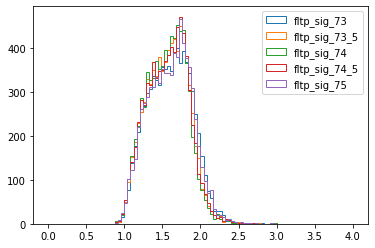

In [36]:
means = []
for sig in sigs:
    plt.hist(df[sig], bins=100, range=(0,4), histtype='step', label=sig)
    means.append(np.average(df[sig]))
plt.legend()
plt.show()

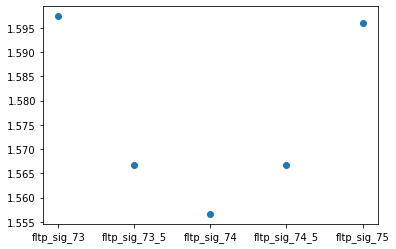

In [37]:
plt.plot(sigs, means, 'o')
plt.show()

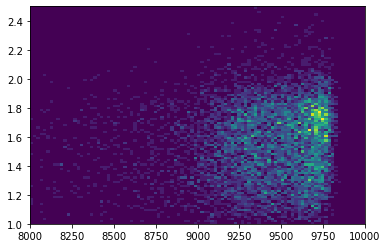

In [38]:
plt.hist2d(df['tp_0'], df['fltp_sig_74'], bins=(100,100), range=((8000,10000),(1,2.5)))
plt.show()

Processing parameters: ['bl, bl_sig', 'wf_blsub', 'wf_pz', 'wf_pz2', 'wf_trap', 'curr10', 'wf_atrap', 'tp_max', 'tp_0']
Required input parameters: ['waveform']
Copied output parameters: ['waveform']
Processed output parameters: ['wf_pz', 'wf_pz2', 'wf_trap', 'curr10', 'wf_atrap', 'bl', 'tp_0', 'tp_max', 'tp_0']
Database lookup: using default value of 74*us for db.pz.tau
Database lookup: using default value of 74*us for db.pz2.tau1
Database lookup: using default value of 3*us for db.pz2.tau2
Database lookup: using default value of 0.013 for db.pz2.frac


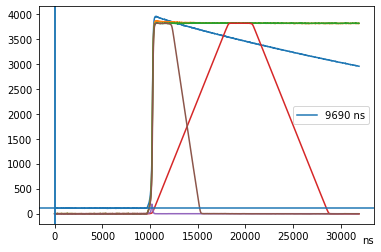

In [30]:
from pygama.io.WaveformBrowser import WaveformBrowser
wb = WaveformBrowser('raw/Run70054_raw.lh5', 'icpcs/icpc1/raw', dsp_config='icpc_dsp.json', waveforms=['waveform', 'wf_pz', 'wf_pz2', 'wf_trap', 'curr10', 'wf_atrap'], lines=['bl', 'tp_0', 'tp_max'], legend=['tp_0'])
wb.draw_next(n_wfs=4)
plt.cla()
wb.draw_next()
plt.show()

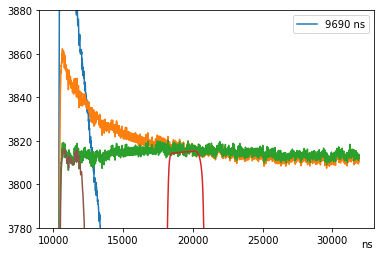

In [12]:
wb.draw_current()
plt.xlim(9000,33000)
plt.ylim(3780,3880)
plt.show()

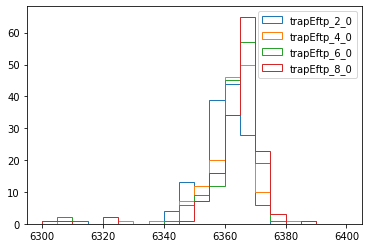

In [10]:
ctc = 30/6380 
for ftp in ftps:
    plt.hist(df[ftp] + ctc*df['ct_corr'], bins=20, range=(6300,6400), histtype='step', label=ftp)
plt.legend()
plt.show()